In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('regional_drug.csv');

In [14]:
df.head()

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72


In [18]:
# Calculating total items prescribed nationally (Sum of antidepressants nationally )
Total_items = df['ITEMS'].sum()
print(f"Total antidepressant items prescribed nationally : {Total_items:,}")

Total antidepressant items prescribed nationally : 333,077,581


In [21]:
# Breaking down according to the year
national_by_year = df.groupby('YEAR')['ITEMS'].sum().reset_index()
print(national_by_year)

   YEAR     ITEMS
0  2021  82620542
1  2022  85404862
2  2023  88469803
3  2024  76582374


In [25]:
# Total National Prescribing Cost - Total cost of all prescribed drugs.
total_cost = df['COST'].sum()
print(f"Total cost of all prescribed antidepressant nationally:£{total_cost:,.2f}")

Total cost of all prescribed antidepressant nationally:£931,950,285.41


In [30]:
# Total National Prescibing Cost by Year.
cost_by_year = df.groupby('YEAR')['COST'].sum().reset_index()
# Formatting it into whole number.
cost_by_year['COST'] = cost_by_year['COST'].apply(lambda x: f"{int(round(x)):,}")
print(cost_by_year)

   YEAR         COST
0  2021  288,099,250
1  2022  224,648,446
2  2023  230,013,660
3  2024  189,188,929


In [33]:
# Top 10 prescribed antidepressant by volume all across NHS
# Group by drug and sum prescription items
top_drugs = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().reset_index()

#Sort descending by items and take top 10
top_10_drugs = top_drugs.sort_values(by='ITEMS', ascending=False).head(10)

#Format number with commas
top_10_drugs['ITEMS'] = top_10_drugs['ITEMS'].apply(lambda x: f"{int(x):,}")

In [35]:
# Top 10 Drugs prescribed
print(top_10_drugs)

         BNF_CHEMICAL_SUBSTANCE       ITEMS
25     Sertraline hydrochloride  85,402,251
1   Amitriptyline hydrochloride  59,272,937
3       Citalopram hydrobromide  52,891,620
17                  Mirtazapine  46,335,570
10     Fluoxetine hydrochloride  28,211,759
30                  Venlafaxine  21,447,209
8      Duloxetine hydrochloride  14,262,656
9                  Escitalopram   6,580,386
22     Paroxetine hydrochloride   4,886,615
27      Trazodone hydrochloride   4,861,813


In [37]:
# Regional Prescribing Volume (Total Items per Region )
region_volume = df.groupby('REGION_NAME')['ITEMS'].sum().reset_index()
region_volume = region_volume.sort_values(by='ITEMS', ascending=False)

# Format with commas
region_volume['ITEMS'] = region_volume['ITEMS'].apply(lambda x: f"{int(x):,}")
print("Regional Prescribing Volume:\n", region_volume)

Regional Prescribing Volume:
                 REGION_NAME       ITEMS
3  NORTH EAST AND YORKSHIRE  72,090,463
2                  MIDLANDS  62,669,553
4                NORTH WEST  49,786,016
5                SOUTH EAST  41,867,132
0           EAST OF ENGLAND  38,431,318
1                    LONDON  35,896,285
6                SOUTH WEST  32,336,814


In [38]:
region_cost = df.groupby('REGION_NAME')['COST'].sum().reset_index()
region_cost = region_cost.sort_values(by='COST', ascending=False)

# Format with commas and £
region_cost['COST'] = region_cost['COST'].apply(lambda x: f"£{int(round(x)):,}")
print("Regional Prescribing Cost:\n", region_cost)

Regional Prescribing Cost:
                 REGION_NAME          COST
2                  MIDLANDS  £176,102,159
3  NORTH EAST AND YORKSHIRE  £175,505,526
5                SOUTH EAST  £143,501,227
4                NORTH WEST  £132,176,692
0           EAST OF ENGLAND  £105,848,326
1                    LONDON  £104,506,394
6                SOUTH WEST   £94,309,962


In [41]:
# Convert YM to datetime
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'], format='%Y%m')

# Group by month (national total)
monthly_items = df.groupby('YEAR_MONTH')['ITEMS'].sum().reset_index()

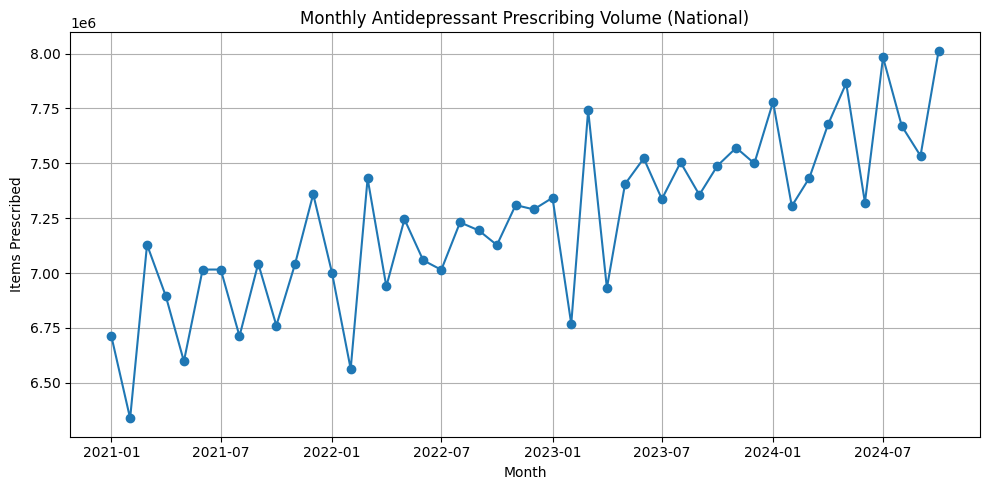

In [42]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_items['YEAR_MONTH'], monthly_items['ITEMS'], marker='o')
plt.title("Monthly Antidepressant Prescribing Volume (National)")
plt.xlabel("Month")
plt.ylabel("Items Prescribed")
plt.grid()
plt.tight_layout()
plt.show()

In [44]:
# Month-to-Month % Change
monthly_items['Monthly_Change_%'] = monthly_items['ITEMS'].pct_change() * 100
print(monthly_items[['YEAR_MONTH', 'ITEMS', 'Monthly_Change_%']].round(2))

   YEAR_MONTH    ITEMS  Monthly_Change_%
0  2021-01-01  6711605               NaN
1  2021-02-01  6337714             -5.57
2  2021-03-01  7129148             12.49
3  2021-04-01  6895434             -3.28
4  2021-05-01  6597509             -4.32
5  2021-06-01  7015796              6.34
6  2021-07-01  7015924              0.00
7  2021-08-01  6712347             -4.33
8  2021-09-01  7043171              4.93
9  2021-10-01  6760692             -4.01
10 2021-11-01  7041687              4.16
11 2021-12-01  7359515              4.51
12 2022-01-01  7002058             -4.86
13 2022-02-01  6562838             -6.27
14 2022-03-01  7430939             13.23
15 2022-04-01  6939008             -6.62
16 2022-05-01  7245109              4.41
17 2022-06-01  7058061             -2.58
18 2022-07-01  7014527             -0.62
19 2022-08-01  7231001              3.09
20 2022-09-01  7194123             -0.51
21 2022-10-01  7127535             -0.93
22 2022-11-01  7309692              2.56
23 2022-12-01  7

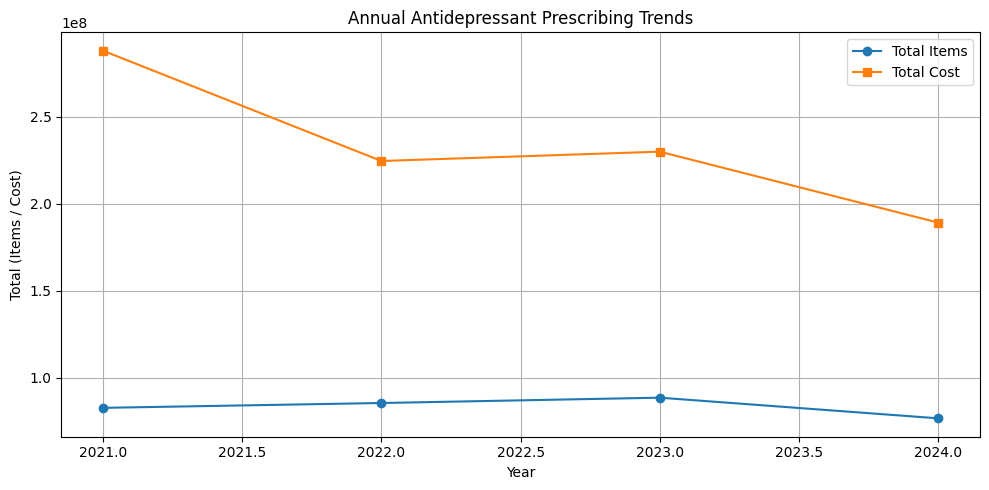

In [45]:
# Annual Prescribing costs

# Group by year
annual = df.groupby('YEAR')[['ITEMS', 'COST']].sum().reset_index()

# Plot
plt.figure(figsize=(10,5))
plt.plot(annual['YEAR'], annual['ITEMS'], marker='o', label="Total Items")
plt.plot(annual['YEAR'], annual['COST'], marker='s', label="Total Cost")
plt.title("Annual Antidepressant Prescribing Trends")
plt.xlabel("Year")
plt.ylabel("Total (Items / Cost)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [46]:
# Year over Year % Change
annual['Item_Change_%'] = annual['ITEMS'].pct_change() * 100
annual['Cost_Change_%'] = annual['COST'].pct_change() * 100
print(annual.round(2))

   YEAR     ITEMS          COST  Item_Change_%  Cost_Change_%
0  2021  82620542  2.880992e+08            NaN            NaN
1  2022  85404862  2.246484e+08           3.37         -22.02
2  2023  88469803  2.300137e+08           3.59           2.39
3  2024  76582374  1.891889e+08         -13.44         -17.75


In [47]:
# There is NAN Present for 2021 as there is no data available before that.

In [48]:
# Drug Cost vs Volume Comparision  - Which drugs are expensive but prescribed less, Which are cheap but prescribed more.
# Prediction of future prescibtion volume - Forecast of future monthly antidepressant prescritions

In [49]:
# High cost - Low volume (expensive per item)
# Low cost - High Volume (cheap but heavily)

In [52]:
# Group by drug and sum total volume and cost
drug_summary = df.groupby('BNF_CHEMICAL_SUBSTANCE')[['ITEMS', 'COST']].sum().reset_index()

# Calculate cost per item
drug_summary['COST_PER_ITEM'] = drug_summary['COST'] / drug_summary['ITEMS']

# Sort by cost per item (optional)
drug_summary_sorted = drug_summary.sort_values(by='COST_PER_ITEM', ascending=False)

# Print top and bottom
print("Top 5 expensive drugs per item:\n", drug_summary_sorted.head(5))
print("\nTop 5 cheap drug per item:\n", drug_summary_sorted.tail(5))

Top 5 expensive drugs per item:
       BNF_CHEMICAL_SUBSTANCE  ITEMS         COST  COST_PER_ITEM
26   Tranylcypromine sulfate  16430  21795619.55    1326.574531
19  Nefazodone hydrochloride     27     17274.69     639.803333
28      Trimipramine maleate  67629  25676577.51     379.668153
14             Isocarboxazid   5668   1951472.03     344.296406
23        Phenelzine sulfate  18205   5579877.96     306.502497

Top 5 cheap drug per item:
          BNF_CHEMICAL_SUBSTANCE     ITEMS          COST  COST_PER_ITEM
25     Sertraline hydrochloride  85402251  2.056530e+08       2.408051
9                  Escitalopram   6580386  1.286274e+07       1.954708
1   Amitriptyline hydrochloride  59272937  9.273951e+07       1.564618
3       Citalopram hydrobromide  52891620  7.522518e+07       1.422251
17                  Mirtazapine  46335570  6.227576e+07       1.344016


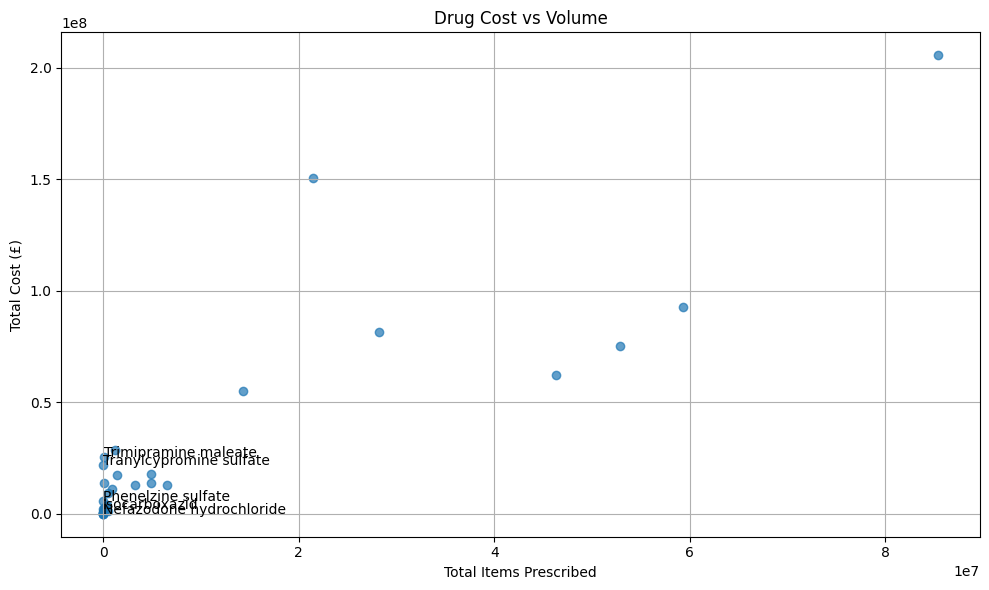

In [54]:
# Scatter Plot (Cost vs Volume )
plt.figure(figsize=(10, 6))
plt.scatter(drug_summary['ITEMS'], drug_summary['COST'], alpha=0.7)
plt.xlabel("Total Items Prescribed")
plt.ylabel("Total Cost (£)")
plt.title("Drug Cost vs Volume")
plt.grid()

# Annotate top 5 most expensive drugs
top_expensive = drug_summary.sort_values('COST_PER_ITEM', ascending=False).head(5)
for _, row in top_expensive.iterrows():
    plt.annotate(row['BNF_CHEMICAL_SUBSTANCE'], (row['ITEMS'], row['COST']))

plt.tight_layout()
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
#Aggregate national monthly prescribing volume
monthly = df.groupby('YEAR_MONTH')['ITEMS'].sum().reset_index()

In [57]:
# Create a time index (0, 1, 2, ..., n)
monthly['Time_Index'] = np.arange(len(monthly))

In [58]:
print(monthly)

   YEAR_MONTH    ITEMS  Time_Index
0  2021-01-01  6711605           0
1  2021-02-01  6337714           1
2  2021-03-01  7129148           2
3  2021-04-01  6895434           3
4  2021-05-01  6597509           4
5  2021-06-01  7015796           5
6  2021-07-01  7015924           6
7  2021-08-01  6712347           7
8  2021-09-01  7043171           8
9  2021-10-01  6760692           9
10 2021-11-01  7041687          10
11 2021-12-01  7359515          11
12 2022-01-01  7002058          12
13 2022-02-01  6562838          13
14 2022-03-01  7430939          14
15 2022-04-01  6939008          15
16 2022-05-01  7245109          16
17 2022-06-01  7058061          17
18 2022-07-01  7014527          18
19 2022-08-01  7231001          19
20 2022-09-01  7194123          20
21 2022-10-01  7127535          21
22 2022-11-01  7309692          22
23 2022-12-01  7289971          23
24 2023-01-01  7343012          24
25 2023-02-01  6768018          25
26 2023-03-01  7742089          26
27 2023-04-01  69314

In [59]:
#Fit a Linear Regression Model
# Define X (time index) and y (prescription volume)
X = monthly[['Time_Index']]
y = monthly['ITEMS']

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict on existing data
monthly['Predicted'] = model.predict(X)

In [60]:
# Forecast for the Next 12 Months
# Extend the time index for future months
future_index = np.arange(len(monthly), len(monthly)+12).reshape(-1, 1)

# Predict future volumes
future_pred = model.predict(future_index)

# Create future dates
last_date = monthly['YEAR_MONTH'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=12, freq='MS')

# Combine into a DataFrame
future_df = pd.DataFrame({'YEAR_MONTH': future_dates, 'Predicted': future_pred})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


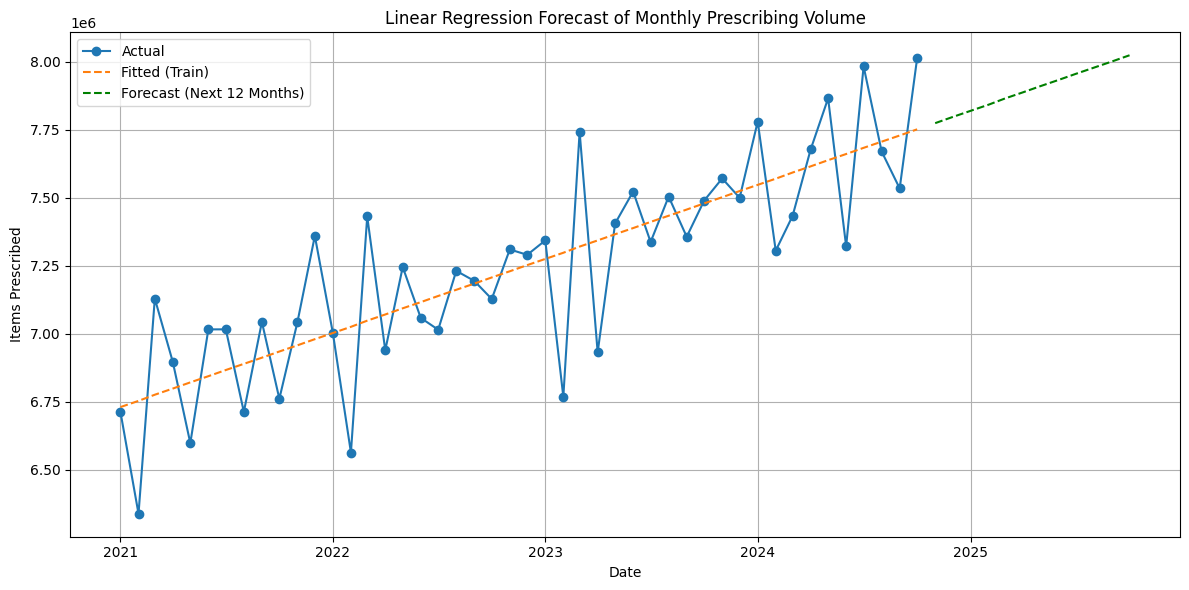

In [61]:
# Plot the Actual, Fitted, and Forecasted Values

plt.figure(figsize=(12, 6))
plt.plot(monthly['YEAR_MONTH'], monthly['ITEMS'], label='Actual', marker='o')
plt.plot(monthly['YEAR_MONTH'], monthly['Predicted'], label='Fitted (Train)', linestyle='--')
plt.plot(future_df['YEAR_MONTH'], future_df['Predicted'], label='Forecast (Next 12 Months)', linestyle='--', color='green')

plt.title("Linear Regression Forecast of Monthly Prescribing Volume")
plt.xlabel("Date")
plt.ylabel("Items Prescribed")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [67]:
""" 📌 Interpretation:
	•	Linear regression gives you a trend-based forecast.
	•	It won’t capture seasonality or sudden changes, but works well for linear growth or decline patterns.
	•	You can improve accuracy by adding more features (e.g., month, year, lags).

"""

' 📌 Interpretation:\n\t•\tLinear regression gives you a trend-based forecast.\n\t•\tIt won’t capture seasonality or sudden changes, but works well for linear growth or decline patterns.\n\t•\tYou can improve accuracy by adding more features (e.g., month, year, lags).\n\n'

In [68]:
# future_df already contains future dates and predicted values

In [69]:
# Round values and format for readability
future_df['Predicted'] = future_df['Predicted'].round().astype(int)
future_df.columns = ['Month', 'Forecasted_Items']

# Display the table
print(future_df)

        Month  Forecasted_Items
0  2024-11-01           7774136
1  2024-12-01           7796830
2  2025-01-01           7819525
3  2025-02-01           7842219
4  2025-03-01           7864913
5  2025-04-01           7887608
6  2025-05-01           7910302
7  2025-06-01           7932997
8  2025-07-01           7955691
9  2025-08-01           7978386
10 2025-09-01           8001080
11 2025-10-01           8023774


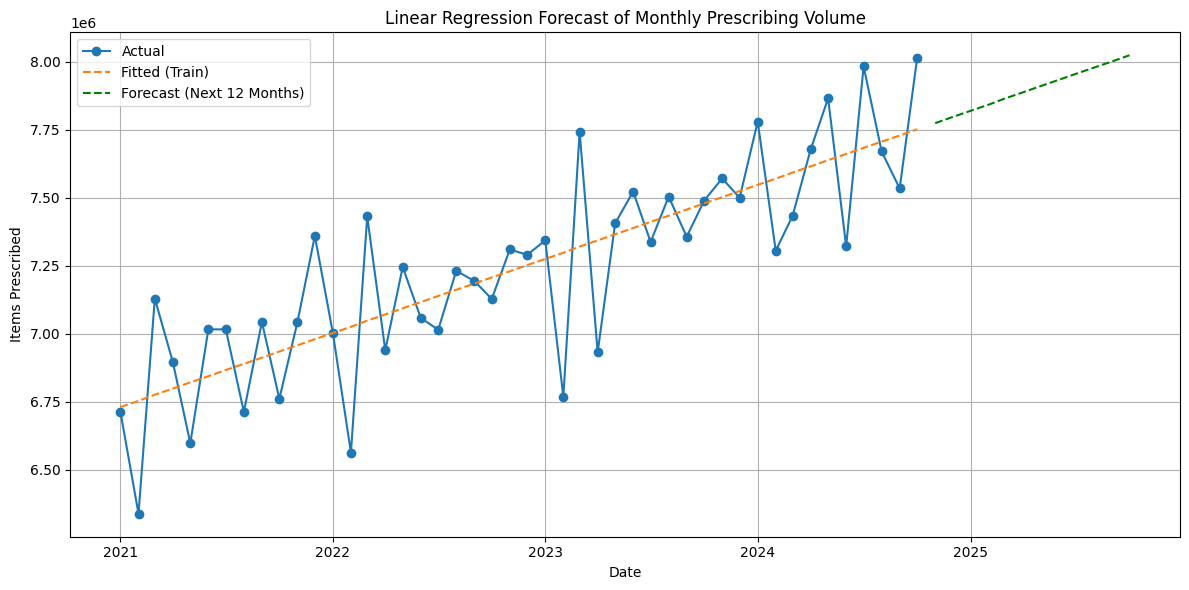

In [71]:
# Displaying Forecast as a Chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly['YEAR_MONTH'], monthly['ITEMS'], label='Actual', marker='o')
plt.plot(monthly['YEAR_MONTH'], monthly['Predicted'], label='Fitted (Train)', linestyle='--')
plt.plot(future_df['Month'], future_df['Forecasted_Items'], label='Forecast (Next 12 Months)', linestyle='--', color='green')

plt.title("Linear Regression Forecast of Monthly Prescribing Volume")
plt.xlabel("Date")
plt.ylabel("Items Prescribed")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-81-cdeb20519f8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_drugs, x='ITEMS', y='BNF_CHEMICAL_SUBSTANCE', palette='Set2')


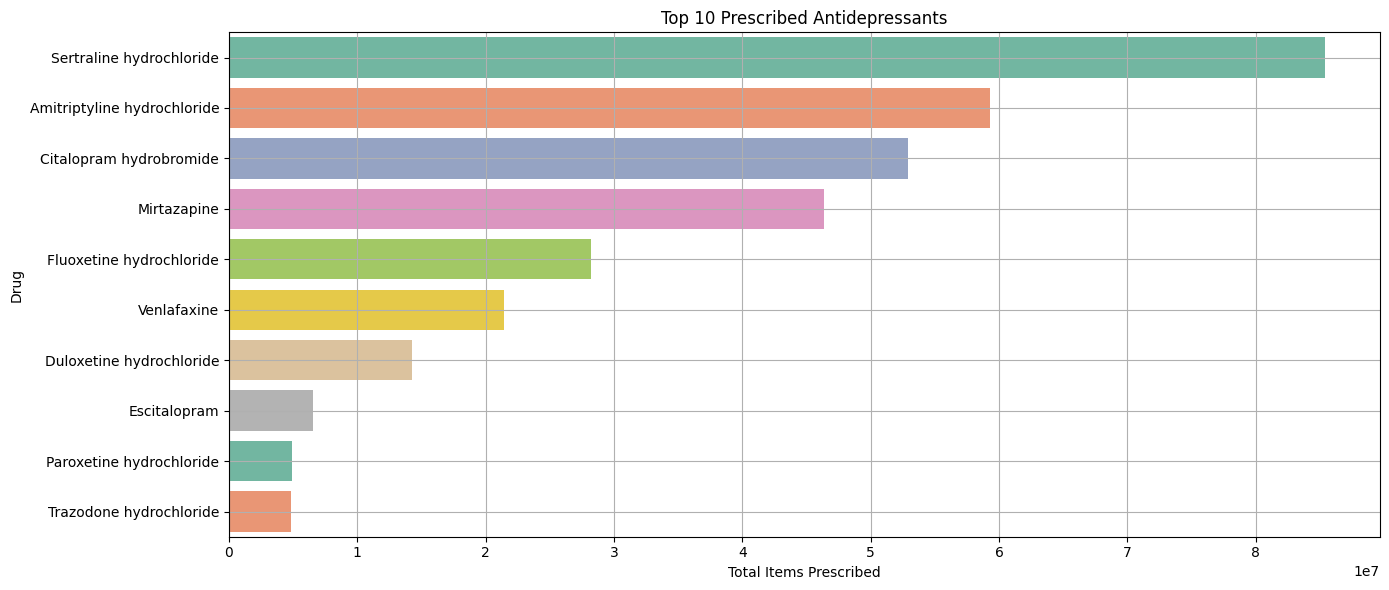

In [81]:
# 1. Top 10 Precibed Antidepressants
top_drugs = df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(14, 6))
sns.barplot(data=top_drugs, x='ITEMS', y='BNF_CHEMICAL_SUBSTANCE', palette='Set2')
plt.title("Top 10 Prescribed Antidepressants")
plt.xlabel("Total Items Prescribed")
plt.ylabel("Drug")
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-83-f9097bd77cd4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_volume, x='ITEMS', y='REGION_NAME', palette='Pastel1')


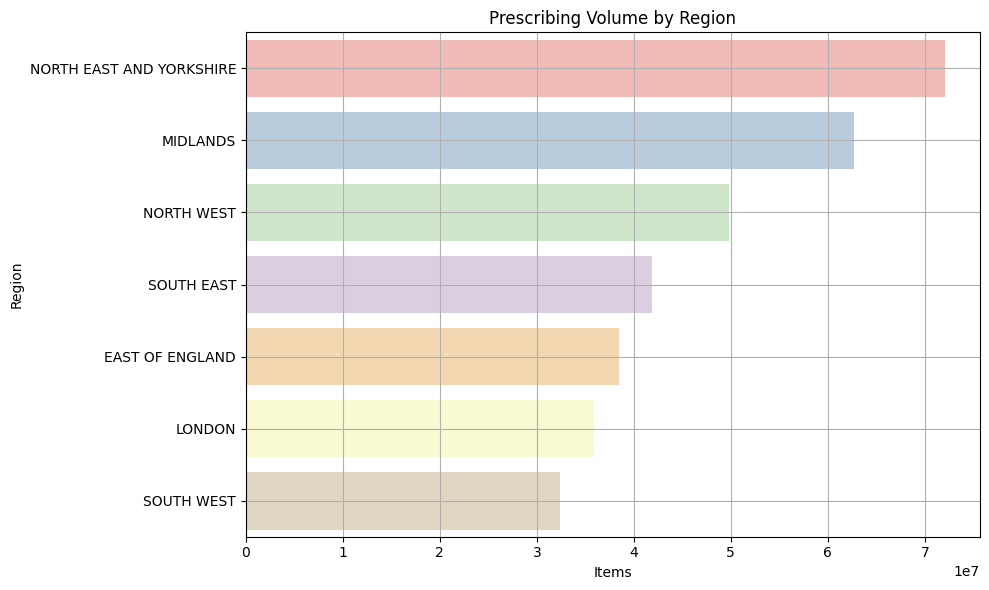

In [83]:
# 3 Regional Prescribing Volume and Cost
region_volume = df.groupby('REGION_NAME')['ITEMS'].sum().sort_values(ascending=False).reset_index()
region_cost = df.groupby('REGION_NAME')['COST'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_volume, x='ITEMS', y='REGION_NAME', palette='Pastel1')
plt.title("Prescribing Volume by Region")
plt.xlabel("Items")
plt.ylabel("Region")
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-75-1af6c503d460>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_cost, x='COST', y='REGION_NAME', palette="viridis")


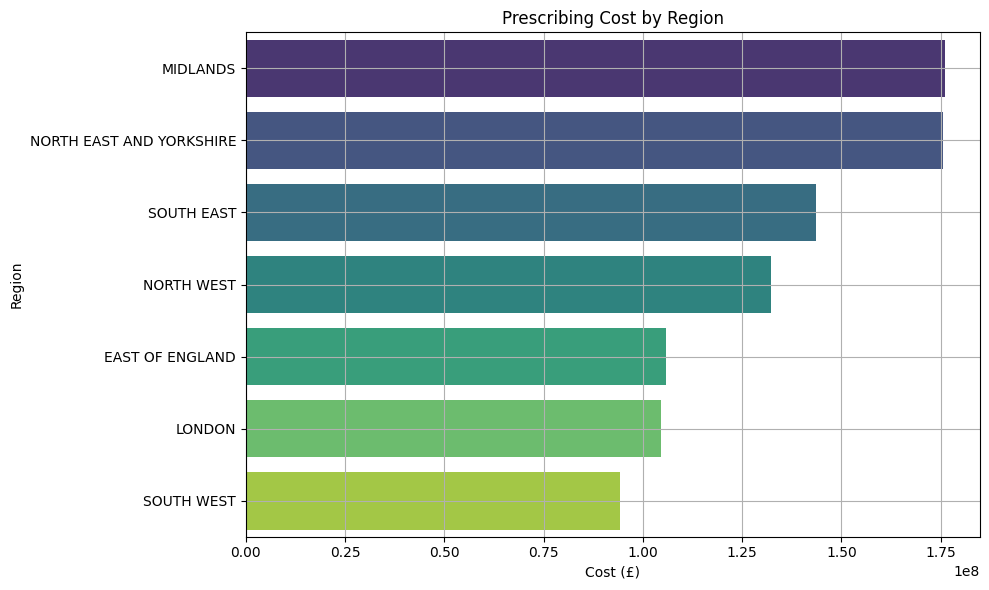

In [75]:
# Prescribing Cost by Region vs Cost
plt.figure(figsize=(10, 6))
sns.barplot(data=region_cost, x='COST', y='REGION_NAME', palette="viridis")
plt.title("Prescribing Cost by Region")
plt.xlabel("Cost (£)")
plt.ylabel("Region")
plt.grid()
plt.tight_layout()
plt.show()

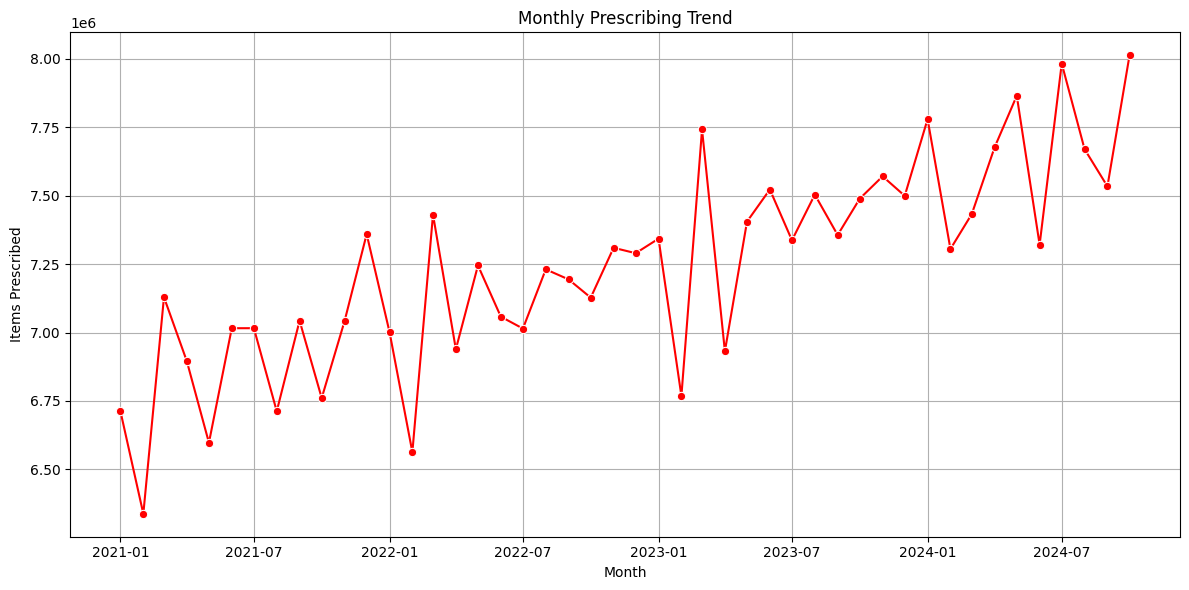

In [84]:
# 4. Monthly Prescribing Trend
monthly_trend = df.groupby('YEAR_MONTH')['ITEMS'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='YEAR_MONTH', y='ITEMS', marker='o', color='red')
plt.title("Monthly Prescribing Trend")
plt.xlabel("Month")
plt.ylabel("Items Prescribed")
plt.grid()
plt.tight_layout()
plt.show()

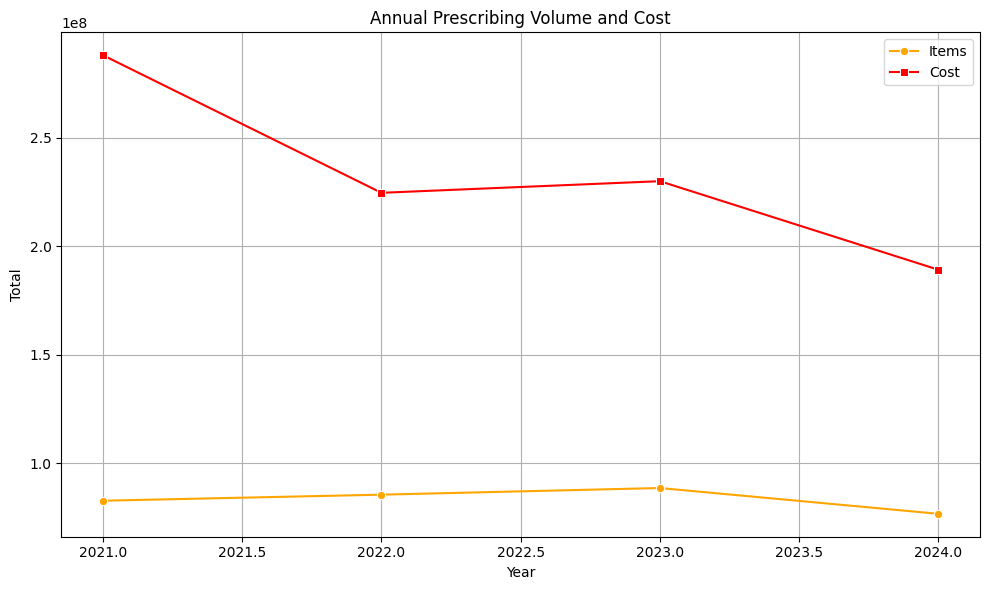

In [85]:
# 5. Annual Prescribing Trend
annual_trend = df.groupby('YEAR')[['ITEMS', 'COST']].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_trend, x='YEAR', y='ITEMS', marker='o', label='Items', color='orange')
sns.lineplot(data=annual_trend, x='YEAR', y='COST', marker='s', label='Cost', color='red')
plt.title("Annual Prescribing Volume and Cost")
plt.xlabel("Year")
plt.ylabel("Total")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

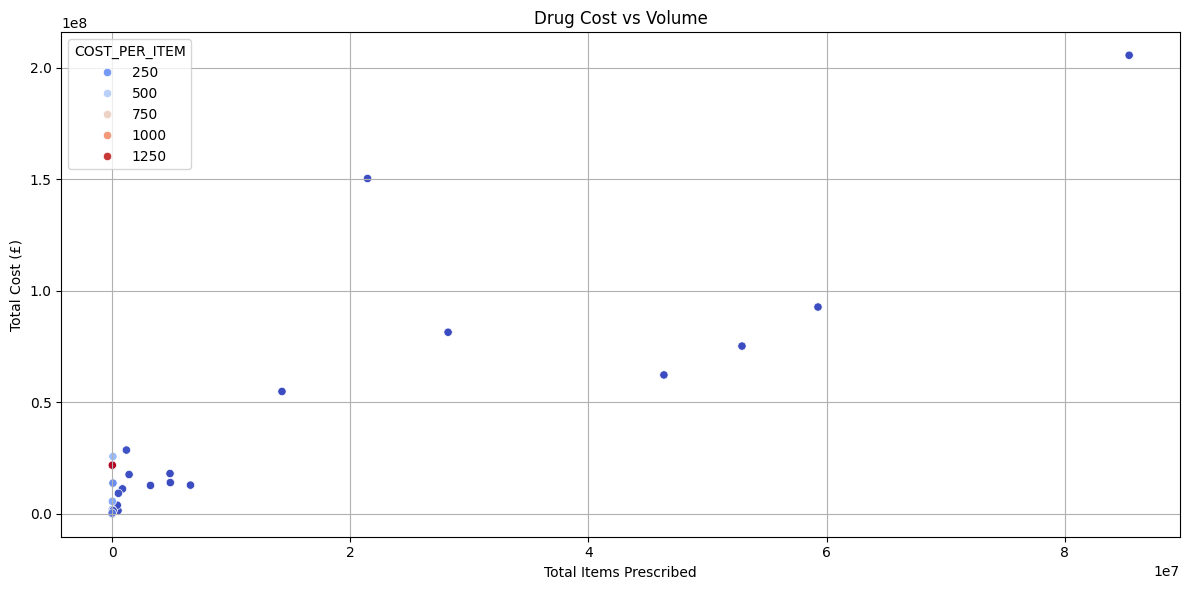

In [78]:
# 6. Drug Cost vs Volume
drug_summary = df.groupby('BNF_CHEMICAL_SUBSTANCE')[['ITEMS', 'COST']].sum().reset_index()
drug_summary['COST_PER_ITEM'] = drug_summary['COST'] / drug_summary['ITEMS']
plt.figure(figsize=(12, 6))
sns.scatterplot(data=drug_summary, x='ITEMS', y='COST', hue='COST_PER_ITEM', palette='coolwarm')
plt.title("Drug Cost vs Volume")
plt.xlabel("Total Items Prescribed")
plt.ylabel("Total Cost (£)")
plt.grid()
plt.tight_layout()
plt.show()